Tugas latihan machine learning
Nama  : Heru Ramdani / NIM   : 1207070053 / Kelas : ML-B

In [ ]:
# Import package
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt

In [208]:
# Load data
customer_data = pd.read_csv("customer_segments.csv")
customer_data.head()

,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
1,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
2,Agus Cahyono,Pria,48,Professional,Cluster,5286429
3,Antonius Winarta,Pria,53,Professional,Cluster,5204498
4,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206


In [209]:
# Data kategori
categorical = ["Jenis Kelamin", "Profesi", "Tipe Residen"]
df_categorical = customer_data[categorical]
df_categorical.head()

,Jenis Kelamin,Profesi,Tipe Residen
0,Pria,Wiraswasta,Sector
1,Wanita,Pelajar,Cluster
2,Pria,Professional,Cluster
3,Pria,Professional,Cluster
4,Wanita,Wiraswasta,Cluster


<Axes: >

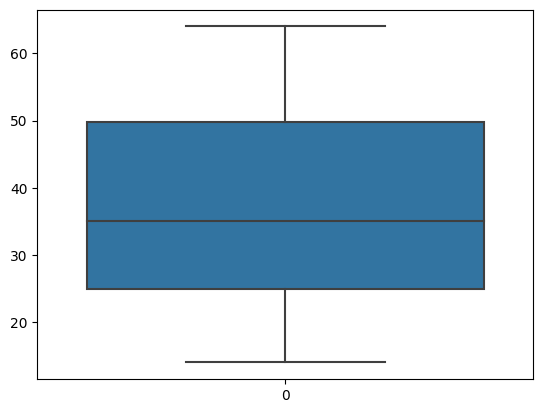

In [210]:
# Persebaran usia pelanggan
sns.boxplot(customer_data["Umur"])

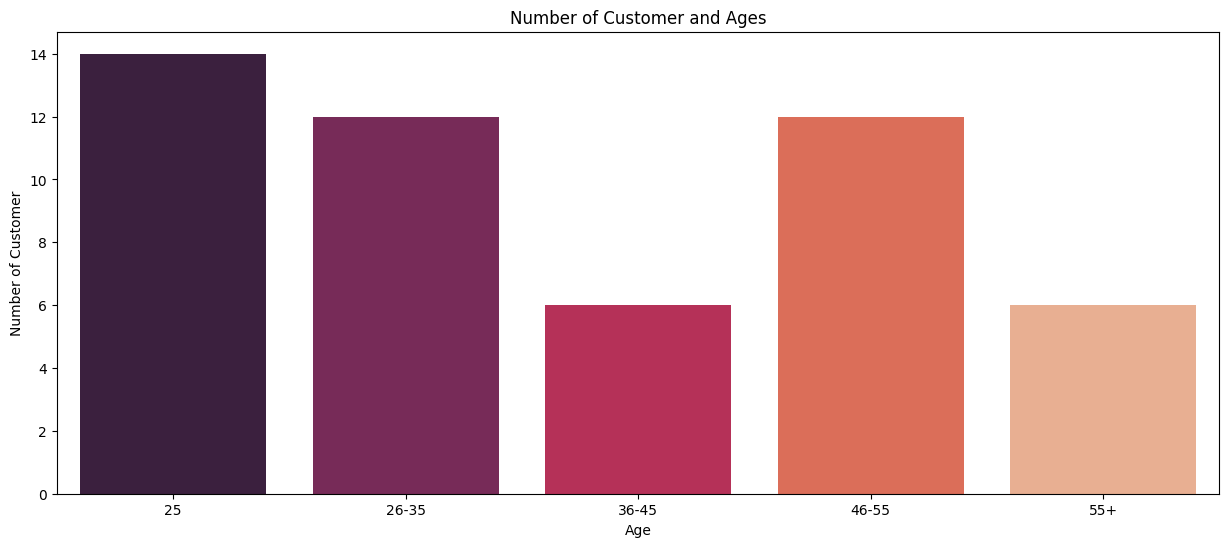

In [211]:
age25below = customer_data.Umur[(customer_data.Umur <= 25) & (customer_data.Umur >= 12)]
age26_35 = customer_data.Umur[(customer_data.Umur <= 35) & (customer_data.Umur >= 26)]
age36_45 = customer_data.Umur[(customer_data.Umur <= 45) & (customer_data.Umur >= 36)]
age46_55 = customer_data.Umur[(customer_data.Umur <= 55) & (customer_data.Umur >= 46)]
age55above = customer_data.Umur[(customer_data.Umur >= 56)]

x = ["25", "26-35", "36-45", "46-55", "55+"]
y= [len(age25below.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

<Axes: >

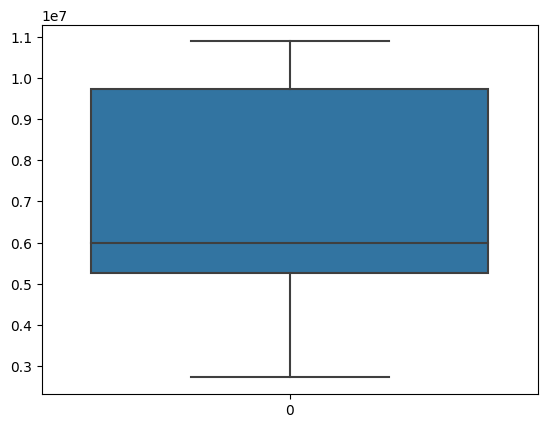

In [212]:
# Persebaran belanja selama setahun
sns.boxplot(customer_data["NilaiBelanjaSetahun"])

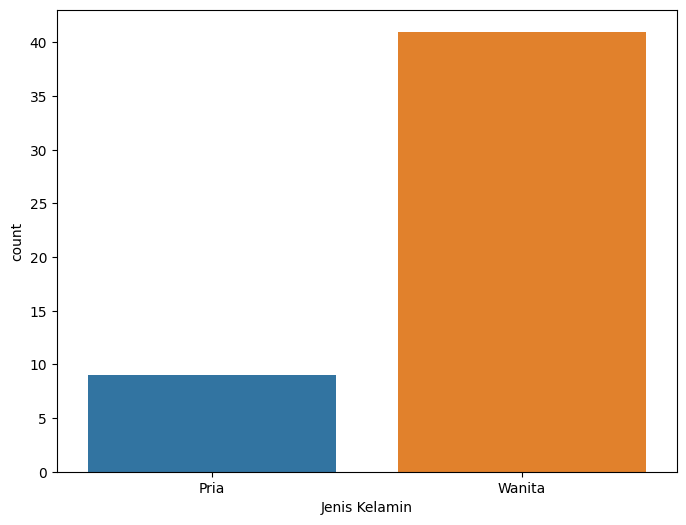

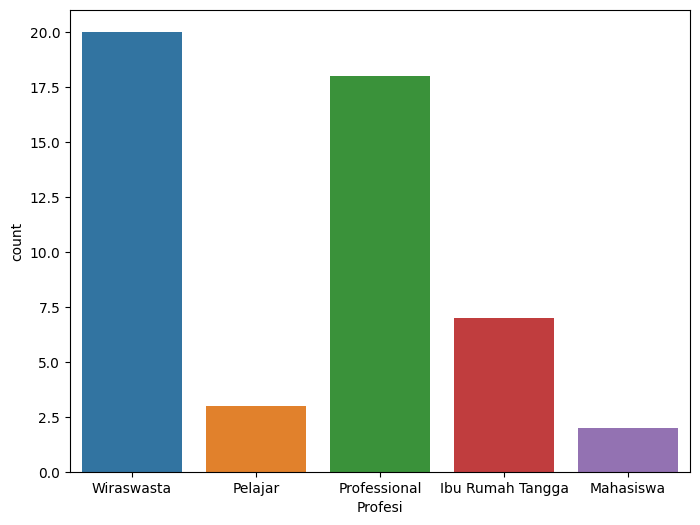

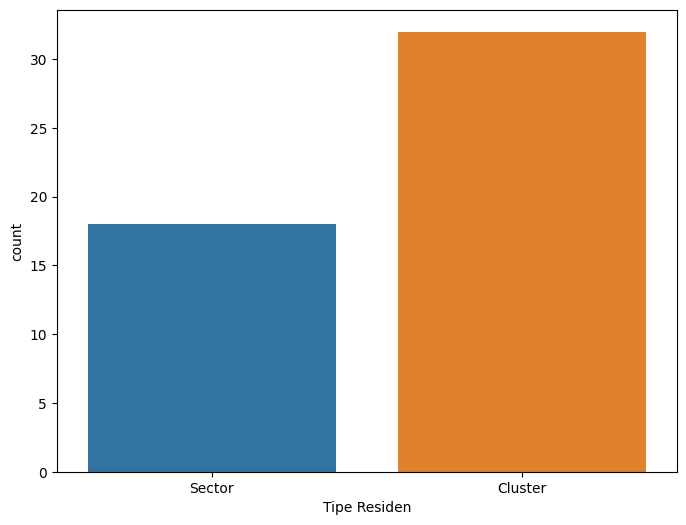

In [213]:
# Melihat perbandingan data kategori dalam setiap kolom
for col in categorical:
  plt.figure(figsize=(8,6))
  sns.countplot(x=col, data=customer_data)

In [214]:
# Merubah data kategori menjadi numerik
label_encoder = LabelEncoder()
encoded_data = customer_data[categorical].apply(label_encoder.fit_transform)

cluster_data = pd.concat([encoded_data, customer_data[["Umur", "NilaiBelanjaSetahun"]]], axis=1)

cluster_data.head()

,Jenis Kelamin,Profesi,Tipe Residen,Umur,NilaiBelanjaSetahun
0,0,4,1,58,9497927
1,1,2,0,14,2722700
2,0,3,0,48,5286429
3,0,3,0,53,5204498
4,1,4,0,41,10615206


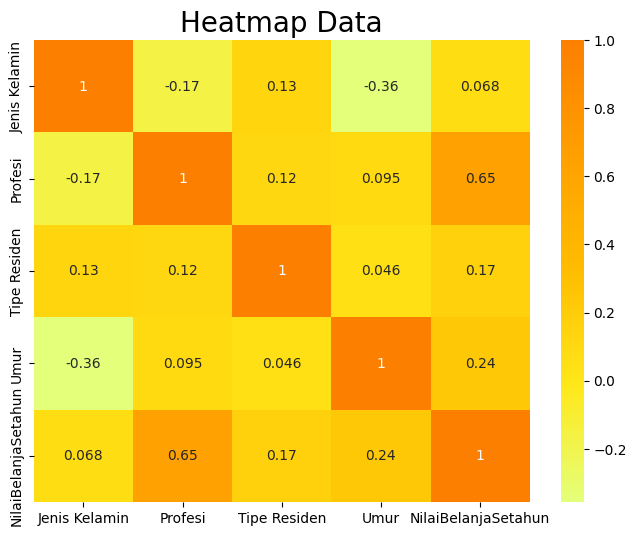

In [215]:
# Features Selection
plt.figure(figsize=(8,6))
sns.heatmap(cluster_data.corr(), cmap = 'Wistia', annot = True)
plt.title("Heatmap Data", fontsize = 20)
plt.show()

In [216]:
# Drop variabel yang tidak dibutuhkan
cluster_data = cluster_data.drop(["Jenis Kelamin", "Tipe Residen", "Umur"], axis = 1)
cluster_data.head()

,Profesi,NilaiBelanjaSetahun
0,4,9497927
1,2,2722700
2,3,5286429
3,3,5204498
4,4,10615206


In [217]:
# Data scaling
scaler = StandardScaler()
cluster_data[["Profesi", "NilaiBelanjaSetahun"]] = scaler.fit_transform(cluster_data[["Profesi", "NilaiBelanjaSetahun"]])
cluster_data.head()

,Profesi,NilaiBelanjaSetahun
0,0.851837,0.946763
1,-0.616847,-1.695081
2,0.117495,-0.695414
3,0.117495,-0.727361
4,0.851837,1.382421


In [218]:
# Menentukan data dengan cluster yang sudah ditentukan yaitu 2
cluster = KMeans(n_clusters=2)
cluster.fit(cluster_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [219]:
# Menambahkan kolom baru berupa hasil segmentasi pelanggan
segment = pd.Series(cluster.labels_, name ="segment")

In [220]:
# Menggabungkan data awal dengan data awal dengan hasil segmentasi
pd.concat([customer_data, segment], axis=1)

,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,segment
0,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,1
1,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,0
2,Agus Cahyono,Pria,48,Professional,Cluster,5286429,0
3,Antonius Winarta,Pria,53,Professional,Cluster,5204498,0
4,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,1
5,Rosalina Kurnia,Wanita,24,Professional,Cluster,5215541,0
6,"Cahyono, Agus",Pria,64,Wiraswasta,Sector,9837260,1
7,Danang Santosa,Pria,52,Professional,Cluster,5223569,0
8,Elisabeth Suryadinata,Wanita,29,Professional,Sector,5993218,0
9,Mario Setiawan,Pria,33,Professional,Cluster,5257448,0


In [221]:
# Perulangan ini digunakan untuk mengeksekusi nilai k dengan data
# Selanjutkan akan dicari SSE

Sum_of_squared_error = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_data)
    Sum_of_squared_error.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

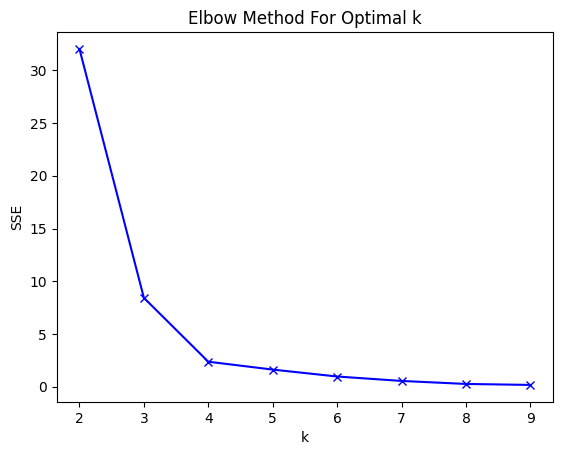

In [222]:
plt.plot(K, Sum_of_squared_error, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

In [223]:
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(cluster_data)
    centers = clusterer.cluster_centers_

    score = silhouette_score(cluster_data, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.681979195097331
For n_clusters = 3, silhouette score is 0.785057992924231
For n_clusters = 4, silhouette score is 0.8491952909238699
For n_clusters = 5, silhouette score is 0.7719536764512731
For n_clusters = 6, silhouette score is 0.7912853388219153
For n_clusters = 7, silhouette score is 0.7773599784790521
For n_clusters = 8, silhouette score is 0.7964226316706623
For n_clusters = 9, silhouette score is 0.7743380058769962


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [224]:
# Memodelkan data dengan k-means
cluster = KMeans(n_clusters=4)
cluster.fit(cluster_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [225]:
# Membuat kolom baru berdasarkan hasil clustering
segment = pd.Series(cluster.labels_, name = "segment")

In [226]:
# Menggabungkan data dengan hasil cluster
results = pd.concat([customer_data, segment], axis = 1)
results.head()

,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,segment
0,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,1
1,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,3
2,Agus Cahyono,Pria,48,Professional,Cluster,5286429,0
3,Antonius Winarta,Pria,53,Professional,Cluster,5204498,0
4,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,1


In [227]:
# Menampilkan 5 data teratas dari cluster 1
results[results["segment"]==0][:5]

,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,segment
2,Agus Cahyono,Pria,48,Professional,Cluster,5286429,0
3,Antonius Winarta,Pria,53,Professional,Cluster,5204498,0
5,Rosalina Kurnia,Wanita,24,Professional,Cluster,5215541,0
7,Danang Santosa,Pria,52,Professional,Cluster,5223569,0
8,Elisabeth Suryadinata,Wanita,29,Professional,Sector,5993218,0


In [228]:
# Menampilkan 5 data teratas dari cluster 2
results[results["segment"]==1][:5]

,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,segment
0,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,1
4,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,1
6,"Cahyono, Agus",Pria,64,Wiraswasta,Sector,9837260,1
12,Cahaya Putri,Wanita,64,Wiraswasta,Cluster,9333168,1
13,Mario Setiawan,Pria,60,Wiraswasta,Cluster,9471615,1


In [229]:
# Menampilkan 5 data teratas dari cluster 2
results[results["segment"]==2][:5]

,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,segment
16,Yuni Sari,Wanita,32,Ibu Rumah Tangga,Cluster,5677762,2
17,Nelly Halim,Wanita,63,Ibu Rumah Tangga,Cluster,5340690,2
27,Adeline Huang,Wanita,40,Ibu Rumah Tangga,Cluster,6631680,2
29,Rosita Saragih,Wanita,46,Ibu Rumah Tangga,Sector,5020976,2
40,Shinta Aritonang,Wanita,24,Ibu Rumah Tangga,Cluster,6820976,2


In [230]:
# Menampilkan 5 data teratas dari cluster 3
results[results["segment"]==3][:5]

,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,segment
1,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,3
19,Irene Novianto,Wanita,16,Pelajar,Sector,2896845,3
30,Eviana Handry,Wanita,19,Mahasiswa,Cluster,3042773,3
32,Cecilia Kusnadi,Wanita,19,Mahasiswa,Cluster,3047926,3
39,Irene Darmawan,Wanita,14,Pelajar,Sector,2861855,3


<Axes: xlabel='segment', ylabel='Umur'>

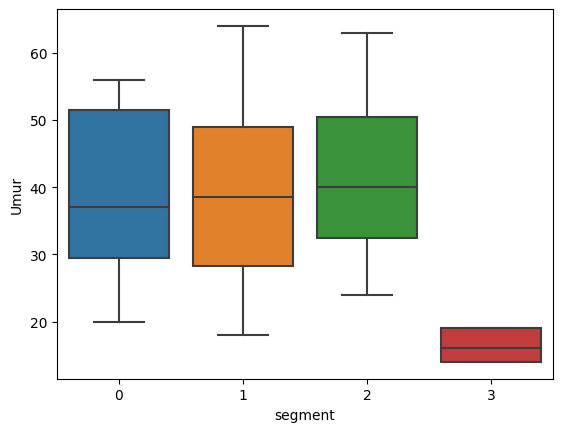

In [231]:
# Pengelompokan customer berdasarkan usia
sns.boxplot(x=results["segment"], y=results["Umur"], data= results)

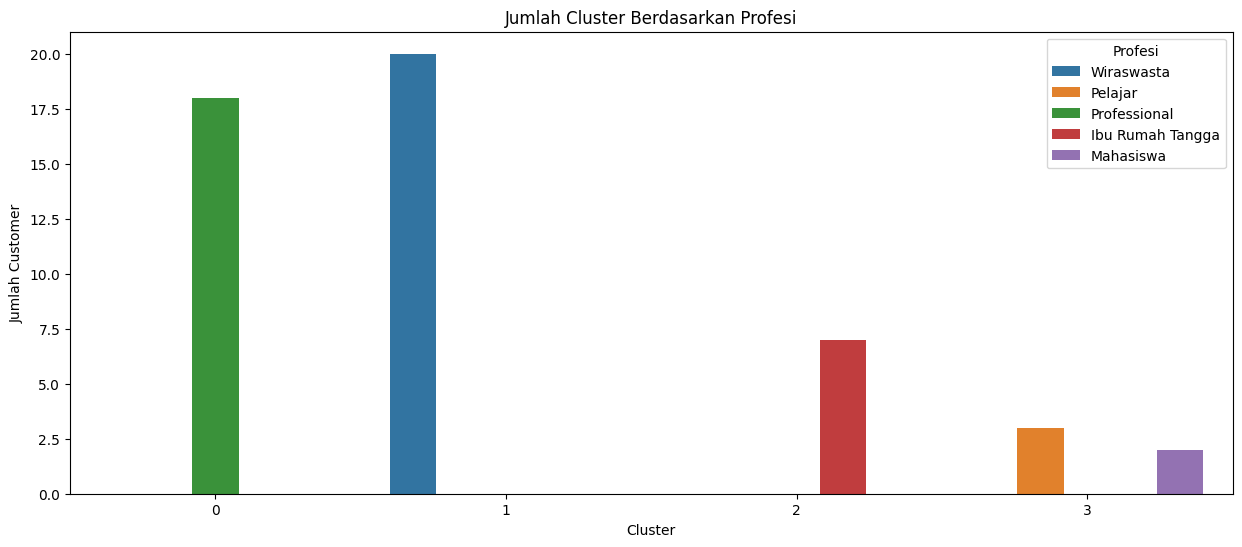

In [232]:
plt.figure(figsize=(15,6))
sns.countplot(x="segment" , data =results, hue= "Profesi")
plt.title("Jumlah Cluster Berdasarkan Profesi")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Customer")
plt.show()


<Axes: xlabel='segment', ylabel='NilaiBelanjaSetahun'>

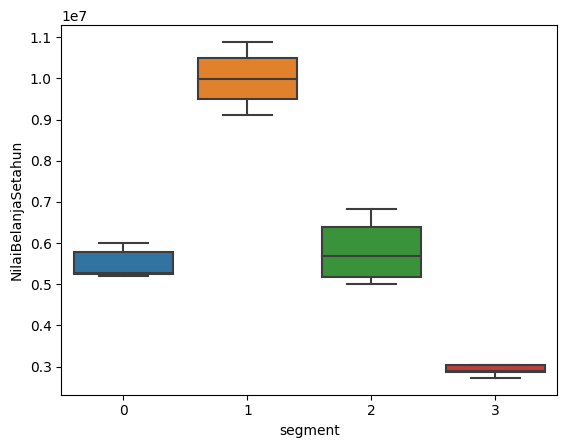

In [233]:
# Pengelompkan customer berdasarkan nilai belanja setahun
sns.boxplot(x=results["segment"], y=results["NilaiBelanjaSetahun"], data=results)

<Axes: xlabel='Umur', ylabel='NilaiBelanjaSetahun'>

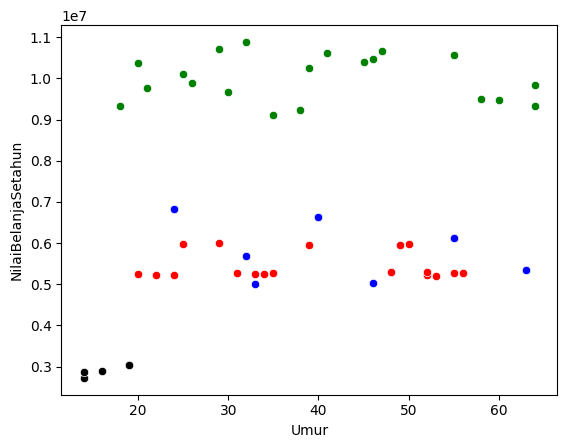

In [234]:
#Plot customer berdasarkan usia dengan menggunakan scatter plot
sns.scatterplot(x=results[results["segment"]==0].Umur, y=results[results["segment"]==0].NilaiBelanjaSetahun, color = "red")
sns.scatterplot(x=results[results["segment"]==1].Umur, y=results[results["segment"]==1].NilaiBelanjaSetahun, color = "green")
sns.scatterplot(x=results[results["segment"]==2].Umur, y=results[results["segment"]==2].NilaiBelanjaSetahun, color = "blue")
sns.scatterplot(x=results[results["segment"]==3].Umur, y=results[results["segment"]==3].NilaiBelanjaSetahun, color = "black")